# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

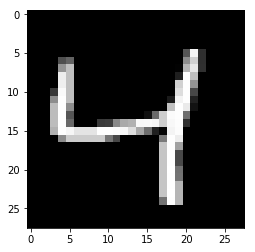

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [21]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 64 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, 784])
targets_ = tf.placeholder(tf.float32, [None, 784])

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded_1 = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)
encoded = tf.layers.dense(encoded_1, encoding_dim)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, 784, activation=None)
# Sigmoid output from logits
decoded = tf.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [22]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [23]:
epochs = 10
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/10... Training loss: 0.6947
Epoch: 1/10... Training loss: 0.6883
Epoch: 1/10... Training loss: 0.6813
Epoch: 1/10... Training loss: 0.6739
Epoch: 1/10... Training loss: 0.6627
Epoch: 1/10... Training loss: 0.6506
Epoch: 1/10... Training loss: 0.6330
Epoch: 1/10... Training loss: 0.6154
Epoch: 1/10... Training loss: 0.5962
Epoch: 1/10... Training loss: 0.5727
Epoch: 1/10... Training loss: 0.5460
Epoch: 1/10... Training loss: 0.5189
Epoch: 1/10... Training loss: 0.4871
Epoch: 1/10... Training loss: 0.4625
Epoch: 1/10... Training loss: 0.4404
Epoch: 1/10... Training loss: 0.4201
Epoch: 1/10... Training loss: 0.3963
Epoch: 1/10... Training loss: 0.3727
Epoch: 1/10... Training loss: 0.3530
Epoch: 1/10... Training loss: 0.3540
Epoch: 1/10... Training loss: 0.3302
Epoch: 1/10... Training loss: 0.3225
Epoch: 1/10... Training loss: 0.3196
Epoch: 1/10... Training loss: 0.3108
Epoch: 1/10... Training loss: 0.2958
Epoch: 1/10... Training loss: 0.3049
Epoch: 1/10... Training loss: 0.2890
E

Epoch: 1/10... Training loss: 0.1645
Epoch: 1/10... Training loss: 0.1719
Epoch: 1/10... Training loss: 0.1706
Epoch: 1/10... Training loss: 0.1672
Epoch: 1/10... Training loss: 0.1688
Epoch: 1/10... Training loss: 0.1696
Epoch: 1/10... Training loss: 0.1694
Epoch: 1/10... Training loss: 0.1615
Epoch: 1/10... Training loss: 0.1680
Epoch: 1/10... Training loss: 0.1627
Epoch: 1/10... Training loss: 0.1615
Epoch: 1/10... Training loss: 0.1701
Epoch: 1/10... Training loss: 0.1639
Epoch: 1/10... Training loss: 0.1676
Epoch: 1/10... Training loss: 0.1613
Epoch: 1/10... Training loss: 0.1698
Epoch: 1/10... Training loss: 0.1647
Epoch: 1/10... Training loss: 0.1636
Epoch: 1/10... Training loss: 0.1622
Epoch: 1/10... Training loss: 0.1631
Epoch: 1/10... Training loss: 0.1621
Epoch: 1/10... Training loss: 0.1673
Epoch: 1/10... Training loss: 0.1611
Epoch: 1/10... Training loss: 0.1617
Epoch: 1/10... Training loss: 0.1634
Epoch: 1/10... Training loss: 0.1598
Epoch: 1/10... Training loss: 0.1641
E

Epoch: 2/10... Training loss: 0.1394
Epoch: 2/10... Training loss: 0.1350
Epoch: 2/10... Training loss: 0.1312
Epoch: 2/10... Training loss: 0.1345
Epoch: 2/10... Training loss: 0.1321
Epoch: 2/10... Training loss: 0.1366
Epoch: 2/10... Training loss: 0.1349
Epoch: 2/10... Training loss: 0.1330
Epoch: 2/10... Training loss: 0.1326
Epoch: 2/10... Training loss: 0.1333
Epoch: 2/10... Training loss: 0.1340
Epoch: 2/10... Training loss: 0.1309
Epoch: 2/10... Training loss: 0.1297
Epoch: 2/10... Training loss: 0.1318
Epoch: 2/10... Training loss: 0.1286
Epoch: 2/10... Training loss: 0.1327
Epoch: 2/10... Training loss: 0.1305
Epoch: 2/10... Training loss: 0.1353
Epoch: 2/10... Training loss: 0.1351
Epoch: 2/10... Training loss: 0.1327
Epoch: 2/10... Training loss: 0.1293
Epoch: 2/10... Training loss: 0.1317
Epoch: 2/10... Training loss: 0.1349
Epoch: 2/10... Training loss: 0.1291
Epoch: 2/10... Training loss: 0.1358
Epoch: 2/10... Training loss: 0.1310
Epoch: 2/10... Training loss: 0.1276
E

Epoch: 3/10... Training loss: 0.1091
Epoch: 3/10... Training loss: 0.1132
Epoch: 3/10... Training loss: 0.1154
Epoch: 3/10... Training loss: 0.1111
Epoch: 3/10... Training loss: 0.1090
Epoch: 3/10... Training loss: 0.1164
Epoch: 3/10... Training loss: 0.1143
Epoch: 3/10... Training loss: 0.1125
Epoch: 3/10... Training loss: 0.1116
Epoch: 3/10... Training loss: 0.1167
Epoch: 3/10... Training loss: 0.1176
Epoch: 3/10... Training loss: 0.1104
Epoch: 3/10... Training loss: 0.1134
Epoch: 3/10... Training loss: 0.1144
Epoch: 3/10... Training loss: 0.1163
Epoch: 3/10... Training loss: 0.1174
Epoch: 3/10... Training loss: 0.1117
Epoch: 3/10... Training loss: 0.1128
Epoch: 3/10... Training loss: 0.1120
Epoch: 3/10... Training loss: 0.1137
Epoch: 3/10... Training loss: 0.1173
Epoch: 3/10... Training loss: 0.1130
Epoch: 3/10... Training loss: 0.1162
Epoch: 3/10... Training loss: 0.1184
Epoch: 3/10... Training loss: 0.1119
Epoch: 3/10... Training loss: 0.1157
Epoch: 3/10... Training loss: 0.1113
E

Epoch: 3/10... Training loss: 0.1029
Epoch: 3/10... Training loss: 0.1064
Epoch: 3/10... Training loss: 0.1050
Epoch: 4/10... Training loss: 0.1038
Epoch: 4/10... Training loss: 0.1054
Epoch: 4/10... Training loss: 0.1059
Epoch: 4/10... Training loss: 0.1020
Epoch: 4/10... Training loss: 0.1090
Epoch: 4/10... Training loss: 0.1040
Epoch: 4/10... Training loss: 0.1025
Epoch: 4/10... Training loss: 0.1086
Epoch: 4/10... Training loss: 0.1049
Epoch: 4/10... Training loss: 0.1085
Epoch: 4/10... Training loss: 0.1087
Epoch: 4/10... Training loss: 0.1008
Epoch: 4/10... Training loss: 0.1036
Epoch: 4/10... Training loss: 0.1058
Epoch: 4/10... Training loss: 0.1054
Epoch: 4/10... Training loss: 0.1059
Epoch: 4/10... Training loss: 0.1013
Epoch: 4/10... Training loss: 0.1023
Epoch: 4/10... Training loss: 0.1054
Epoch: 4/10... Training loss: 0.1061
Epoch: 4/10... Training loss: 0.1022
Epoch: 4/10... Training loss: 0.1041
Epoch: 4/10... Training loss: 0.1031
Epoch: 4/10... Training loss: 0.1035
E

Epoch: 4/10... Training loss: 0.1007
Epoch: 4/10... Training loss: 0.1026
Epoch: 4/10... Training loss: 0.0972
Epoch: 4/10... Training loss: 0.0955
Epoch: 4/10... Training loss: 0.0961
Epoch: 4/10... Training loss: 0.1022
Epoch: 4/10... Training loss: 0.1017
Epoch: 4/10... Training loss: 0.0958
Epoch: 4/10... Training loss: 0.0989
Epoch: 4/10... Training loss: 0.1011
Epoch: 4/10... Training loss: 0.0986
Epoch: 4/10... Training loss: 0.0989
Epoch: 4/10... Training loss: 0.0980
Epoch: 4/10... Training loss: 0.1006
Epoch: 4/10... Training loss: 0.1007
Epoch: 4/10... Training loss: 0.0987
Epoch: 4/10... Training loss: 0.0993
Epoch: 4/10... Training loss: 0.0977
Epoch: 4/10... Training loss: 0.1011
Epoch: 4/10... Training loss: 0.0989
Epoch: 4/10... Training loss: 0.1004
Epoch: 4/10... Training loss: 0.1013
Epoch: 4/10... Training loss: 0.0967
Epoch: 4/10... Training loss: 0.0996
Epoch: 4/10... Training loss: 0.0982
Epoch: 4/10... Training loss: 0.1002
Epoch: 4/10... Training loss: 0.1014
E

Epoch: 5/10... Training loss: 0.0943
Epoch: 5/10... Training loss: 0.0992
Epoch: 5/10... Training loss: 0.0941
Epoch: 5/10... Training loss: 0.0963
Epoch: 5/10... Training loss: 0.0902
Epoch: 5/10... Training loss: 0.0949
Epoch: 5/10... Training loss: 0.0959
Epoch: 5/10... Training loss: 0.0950
Epoch: 5/10... Training loss: 0.0956
Epoch: 5/10... Training loss: 0.0933
Epoch: 5/10... Training loss: 0.0968
Epoch: 5/10... Training loss: 0.0953
Epoch: 5/10... Training loss: 0.0998
Epoch: 5/10... Training loss: 0.0995
Epoch: 5/10... Training loss: 0.0966
Epoch: 5/10... Training loss: 0.0941
Epoch: 5/10... Training loss: 0.0946
Epoch: 5/10... Training loss: 0.0959
Epoch: 5/10... Training loss: 0.0965
Epoch: 5/10... Training loss: 0.0925
Epoch: 5/10... Training loss: 0.0972
Epoch: 5/10... Training loss: 0.0915
Epoch: 5/10... Training loss: 0.0948
Epoch: 5/10... Training loss: 0.0954
Epoch: 5/10... Training loss: 0.0946
Epoch: 5/10... Training loss: 0.0937
Epoch: 5/10... Training loss: 0.0966
E

Epoch: 6/10... Training loss: 0.0917
Epoch: 6/10... Training loss: 0.0915
Epoch: 6/10... Training loss: 0.0913
Epoch: 6/10... Training loss: 0.0949
Epoch: 6/10... Training loss: 0.0918
Epoch: 6/10... Training loss: 0.0932
Epoch: 6/10... Training loss: 0.0918
Epoch: 6/10... Training loss: 0.0912
Epoch: 6/10... Training loss: 0.0915
Epoch: 6/10... Training loss: 0.0913
Epoch: 6/10... Training loss: 0.0912
Epoch: 6/10... Training loss: 0.0932
Epoch: 6/10... Training loss: 0.0928
Epoch: 6/10... Training loss: 0.0930
Epoch: 6/10... Training loss: 0.0925
Epoch: 6/10... Training loss: 0.0904
Epoch: 6/10... Training loss: 0.0938
Epoch: 6/10... Training loss: 0.0929
Epoch: 6/10... Training loss: 0.0915
Epoch: 6/10... Training loss: 0.0928
Epoch: 6/10... Training loss: 0.0931
Epoch: 6/10... Training loss: 0.0908
Epoch: 6/10... Training loss: 0.0926
Epoch: 6/10... Training loss: 0.0889
Epoch: 6/10... Training loss: 0.0934
Epoch: 6/10... Training loss: 0.0920
Epoch: 6/10... Training loss: 0.0918
E

Epoch: 6/10... Training loss: 0.0854
Epoch: 6/10... Training loss: 0.0880
Epoch: 6/10... Training loss: 0.0903
Epoch: 6/10... Training loss: 0.0894
Epoch: 6/10... Training loss: 0.0892
Epoch: 6/10... Training loss: 0.0905
Epoch: 6/10... Training loss: 0.0885
Epoch: 6/10... Training loss: 0.0892
Epoch: 6/10... Training loss: 0.0891
Epoch: 6/10... Training loss: 0.0910
Epoch: 6/10... Training loss: 0.0925
Epoch: 6/10... Training loss: 0.0870
Epoch: 7/10... Training loss: 0.0886
Epoch: 7/10... Training loss: 0.0895
Epoch: 7/10... Training loss: 0.0867
Epoch: 7/10... Training loss: 0.0886
Epoch: 7/10... Training loss: 0.0865
Epoch: 7/10... Training loss: 0.0856
Epoch: 7/10... Training loss: 0.0886
Epoch: 7/10... Training loss: 0.0904
Epoch: 7/10... Training loss: 0.0895
Epoch: 7/10... Training loss: 0.0902
Epoch: 7/10... Training loss: 0.0856
Epoch: 7/10... Training loss: 0.0886
Epoch: 7/10... Training loss: 0.0888
Epoch: 7/10... Training loss: 0.0896
Epoch: 7/10... Training loss: 0.0918
E

Epoch: 7/10... Training loss: 0.0908
Epoch: 7/10... Training loss: 0.0870
Epoch: 7/10... Training loss: 0.0891
Epoch: 7/10... Training loss: 0.0884
Epoch: 7/10... Training loss: 0.0890
Epoch: 7/10... Training loss: 0.0874
Epoch: 7/10... Training loss: 0.0855
Epoch: 7/10... Training loss: 0.0864
Epoch: 7/10... Training loss: 0.0881
Epoch: 7/10... Training loss: 0.0851
Epoch: 7/10... Training loss: 0.0874
Epoch: 7/10... Training loss: 0.0867
Epoch: 7/10... Training loss: 0.0824
Epoch: 7/10... Training loss: 0.0906
Epoch: 7/10... Training loss: 0.0899
Epoch: 7/10... Training loss: 0.0868
Epoch: 7/10... Training loss: 0.0896
Epoch: 7/10... Training loss: 0.0866
Epoch: 7/10... Training loss: 0.0861
Epoch: 7/10... Training loss: 0.0874
Epoch: 7/10... Training loss: 0.0886
Epoch: 7/10... Training loss: 0.0847
Epoch: 7/10... Training loss: 0.0871
Epoch: 7/10... Training loss: 0.0849
Epoch: 7/10... Training loss: 0.0862
Epoch: 7/10... Training loss: 0.0863
Epoch: 7/10... Training loss: 0.0866
E

Epoch: 8/10... Training loss: 0.0854
Epoch: 8/10... Training loss: 0.0848
Epoch: 8/10... Training loss: 0.0856
Epoch: 8/10... Training loss: 0.0879
Epoch: 8/10... Training loss: 0.0866
Epoch: 8/10... Training loss: 0.0860
Epoch: 8/10... Training loss: 0.0900
Epoch: 8/10... Training loss: 0.0859
Epoch: 8/10... Training loss: 0.0893
Epoch: 8/10... Training loss: 0.0852
Epoch: 8/10... Training loss: 0.0869
Epoch: 8/10... Training loss: 0.0840
Epoch: 8/10... Training loss: 0.0845
Epoch: 8/10... Training loss: 0.0862
Epoch: 8/10... Training loss: 0.0869
Epoch: 8/10... Training loss: 0.0839
Epoch: 8/10... Training loss: 0.0852
Epoch: 8/10... Training loss: 0.0845
Epoch: 8/10... Training loss: 0.0876
Epoch: 8/10... Training loss: 0.0843
Epoch: 8/10... Training loss: 0.0847
Epoch: 8/10... Training loss: 0.0876
Epoch: 8/10... Training loss: 0.0862
Epoch: 8/10... Training loss: 0.0866
Epoch: 8/10... Training loss: 0.0840
Epoch: 8/10... Training loss: 0.0884
Epoch: 8/10... Training loss: 0.0852
E

Epoch: 9/10... Training loss: 0.0829
Epoch: 9/10... Training loss: 0.0828
Epoch: 9/10... Training loss: 0.0842
Epoch: 9/10... Training loss: 0.0817
Epoch: 9/10... Training loss: 0.0842
Epoch: 9/10... Training loss: 0.0845
Epoch: 9/10... Training loss: 0.0858
Epoch: 9/10... Training loss: 0.0852
Epoch: 9/10... Training loss: 0.0826
Epoch: 9/10... Training loss: 0.0858
Epoch: 9/10... Training loss: 0.0846
Epoch: 9/10... Training loss: 0.0864
Epoch: 9/10... Training loss: 0.0847
Epoch: 9/10... Training loss: 0.0828
Epoch: 9/10... Training loss: 0.0830
Epoch: 9/10... Training loss: 0.0859
Epoch: 9/10... Training loss: 0.0833
Epoch: 9/10... Training loss: 0.0837
Epoch: 9/10... Training loss: 0.0849
Epoch: 9/10... Training loss: 0.0848
Epoch: 9/10... Training loss: 0.0829
Epoch: 9/10... Training loss: 0.0833
Epoch: 9/10... Training loss: 0.0836
Epoch: 9/10... Training loss: 0.0838
Epoch: 9/10... Training loss: 0.0833
Epoch: 9/10... Training loss: 0.0830
Epoch: 9/10... Training loss: 0.0857
E

Epoch: 9/10... Training loss: 0.0823
Epoch: 9/10... Training loss: 0.0809
Epoch: 9/10... Training loss: 0.0822
Epoch: 9/10... Training loss: 0.0828
Epoch: 9/10... Training loss: 0.0796
Epoch: 9/10... Training loss: 0.0849
Epoch: 9/10... Training loss: 0.0868
Epoch: 9/10... Training loss: 0.0824
Epoch: 9/10... Training loss: 0.0838
Epoch: 9/10... Training loss: 0.0860
Epoch: 9/10... Training loss: 0.0845
Epoch: 9/10... Training loss: 0.0821
Epoch: 9/10... Training loss: 0.0841
Epoch: 9/10... Training loss: 0.0856
Epoch: 9/10... Training loss: 0.0835
Epoch: 9/10... Training loss: 0.0854
Epoch: 9/10... Training loss: 0.0857
Epoch: 10/10... Training loss: 0.0828
Epoch: 10/10... Training loss: 0.0823
Epoch: 10/10... Training loss: 0.0827
Epoch: 10/10... Training loss: 0.0824
Epoch: 10/10... Training loss: 0.0859
Epoch: 10/10... Training loss: 0.0819
Epoch: 10/10... Training loss: 0.0792
Epoch: 10/10... Training loss: 0.0839
Epoch: 10/10... Training loss: 0.0852
Epoch: 10/10... Training loss

Epoch: 10/10... Training loss: 0.0818
Epoch: 10/10... Training loss: 0.0856
Epoch: 10/10... Training loss: 0.0841
Epoch: 10/10... Training loss: 0.0810
Epoch: 10/10... Training loss: 0.0840
Epoch: 10/10... Training loss: 0.0809
Epoch: 10/10... Training loss: 0.0810
Epoch: 10/10... Training loss: 0.0861
Epoch: 10/10... Training loss: 0.0842
Epoch: 10/10... Training loss: 0.0826
Epoch: 10/10... Training loss: 0.0826
Epoch: 10/10... Training loss: 0.0839
Epoch: 10/10... Training loss: 0.0817
Epoch: 10/10... Training loss: 0.0855
Epoch: 10/10... Training loss: 0.0843
Epoch: 10/10... Training loss: 0.0811
Epoch: 10/10... Training loss: 0.0832
Epoch: 10/10... Training loss: 0.0824
Epoch: 10/10... Training loss: 0.0831
Epoch: 10/10... Training loss: 0.0846
Epoch: 10/10... Training loss: 0.0829
Epoch: 10/10... Training loss: 0.0808
Epoch: 10/10... Training loss: 0.0836
Epoch: 10/10... Training loss: 0.0832
Epoch: 10/10... Training loss: 0.0848
Epoch: 10/10... Training loss: 0.0845
Epoch: 10/10

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

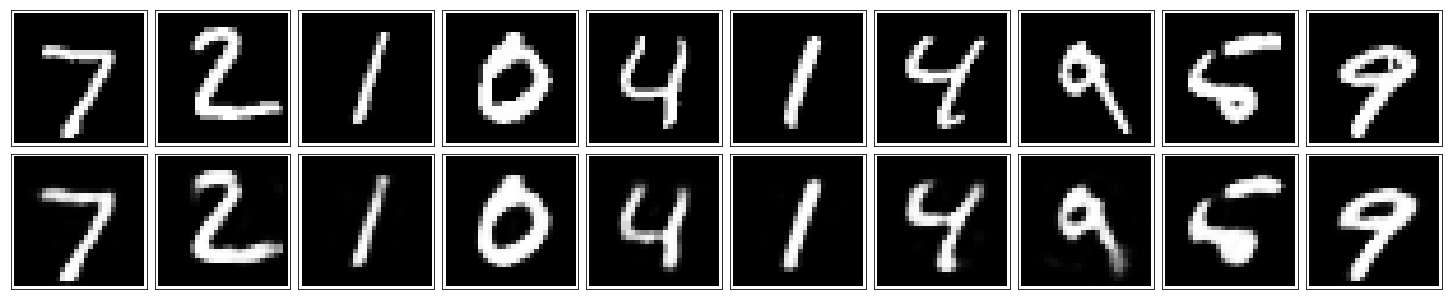

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [25]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.